In [104]:
# Numpy: Provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.
import numpy as np
# Pandas: Offers data structures and data analysis tools for handling and manipulating structured data efficiently.
import pandas as pd
# Matplotlib: A plotting library used for creating static, animated, and interactive visualizations in Python.
import matplotlib.pyplot as plt
# Seaborn: A data visualization library based on Matplotlib that provides a high-level interface for drawing attractive statistical graphics.
import seaborn as sns
# Sklearn datasets: Provides various datasets, including toy datasets, for testing machine learning algorithms.
from sklearn.datasets import load_iris
# Sklearn preprocessing: Includes tools for scaling, transforming, and normalizing data.
from sklearn.preprocessing import StandardScaler
# Sklearn KMeans: An algorithm to partition data into clusters by minimizing the variance within each cluster.
from sklearn.cluster import KMeans
# Sklearn DBSCAN: A clustering algorithm that groups together closely packed points and marks points that lie alone in low-density regions as outliers.
from sklearn.cluster import DBSCAN
# Sklearn silhouette_score: A metric to evaluate the quality of clusters formed by a clustering algorithm.
from sklearn.metrics import silhouette_score
# Scipy dendrogram: A visualization tool for hierarchical clustering that shows how clusters are merged or split.
from scipy.cluster.hierarchy import dendrogram
# Scipy linkage: A method to perform hierarchical/agglomerative clustering on the dataset.
from scipy.cluster.hierarchy import linkage
# Scipy fcluster: A function to extract flat clusters from the hierarchical clustering defined by the linkage matrix.
from scipy.cluster.hierarchy import fcluster

In [105]:
# Reading the "data" sheet from the Excel file into a pandas DataFrame.
airlines = pd.read_excel("EastWestAirlines.xlsx", sheet_name="data")

# Displaying the contents of the DataFrame.
airlines


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [106]:
# Displaying the data types of variables
airlines.dtypes

ID#                  int64
Balance              int64
Qual_miles           int64
cc1_miles            int64
cc2_miles            int64
cc3_miles            int64
Bonus_miles          int64
Bonus_trans          int64
Flight_miles_12mo    int64
Flight_trans_12      int64
Days_since_enroll    int64
Award?               int64
dtype: object

In [107]:
# Converting the data types of some variables to category
airlines = airlines.astype({"ID#" : "category", "cc1_miles" : "category", "cc2_miles" : "category", "cc3_miles" : "category", "Award?" : "category"})

# Displaying the data types of variables after converting
airlines.dtypes

ID#                  category
Balance                 int64
Qual_miles              int64
cc1_miles            category
cc2_miles            category
cc3_miles            category
Bonus_miles             int64
Bonus_trans             int64
Flight_miles_12mo       int64
Flight_trans_12         int64
Days_since_enroll       int64
Award?               category
dtype: object

In [108]:
# Dropping the ID# column which is not required
airlines = airlines.drop(["ID#"], axis = 1)

In [109]:
# Dividing categorical columns and numerical columns and assining it to cat_cols and num_cols
cat_cols = ["cc1_miles", "cc2_miles", "cc3_miles"]
num_cols = ["Balance", "Qual_miles", "Bonus_miles", "Bonus_trans", "Flight_miles_12mo", "Flight_trans_12", "Days_since_enroll"]

In [110]:
# Describing the basic statistic of the data set
airlines.describe()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
count,3.999000e+03,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000
mean,7.360133e+04,144.114529,17144.846212,11.60190,460.055764,1.373593,4118.55939
std,1.007757e+05,773.663804,24150.967826,9.60381,1400.209171,3.793172,2065.13454
min,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,2.00000
25%,1.852750e+04,0.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000
50%,4.309700e+04,0.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000
75%,9.240400e+04,0.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000
max,1.704838e+06,11148.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000


In [111]:
# Checking the null values for each column
airlines.isnull().sum()

Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [112]:
# Checking for the duplicates
airlines.duplicated().sum()

1

In [113]:
# Dropping the duplicate observations
airlines = airlines.drop_duplicates()

# Checking the number of observations after dropping the duplicates
airlines.shape

(3998, 11)

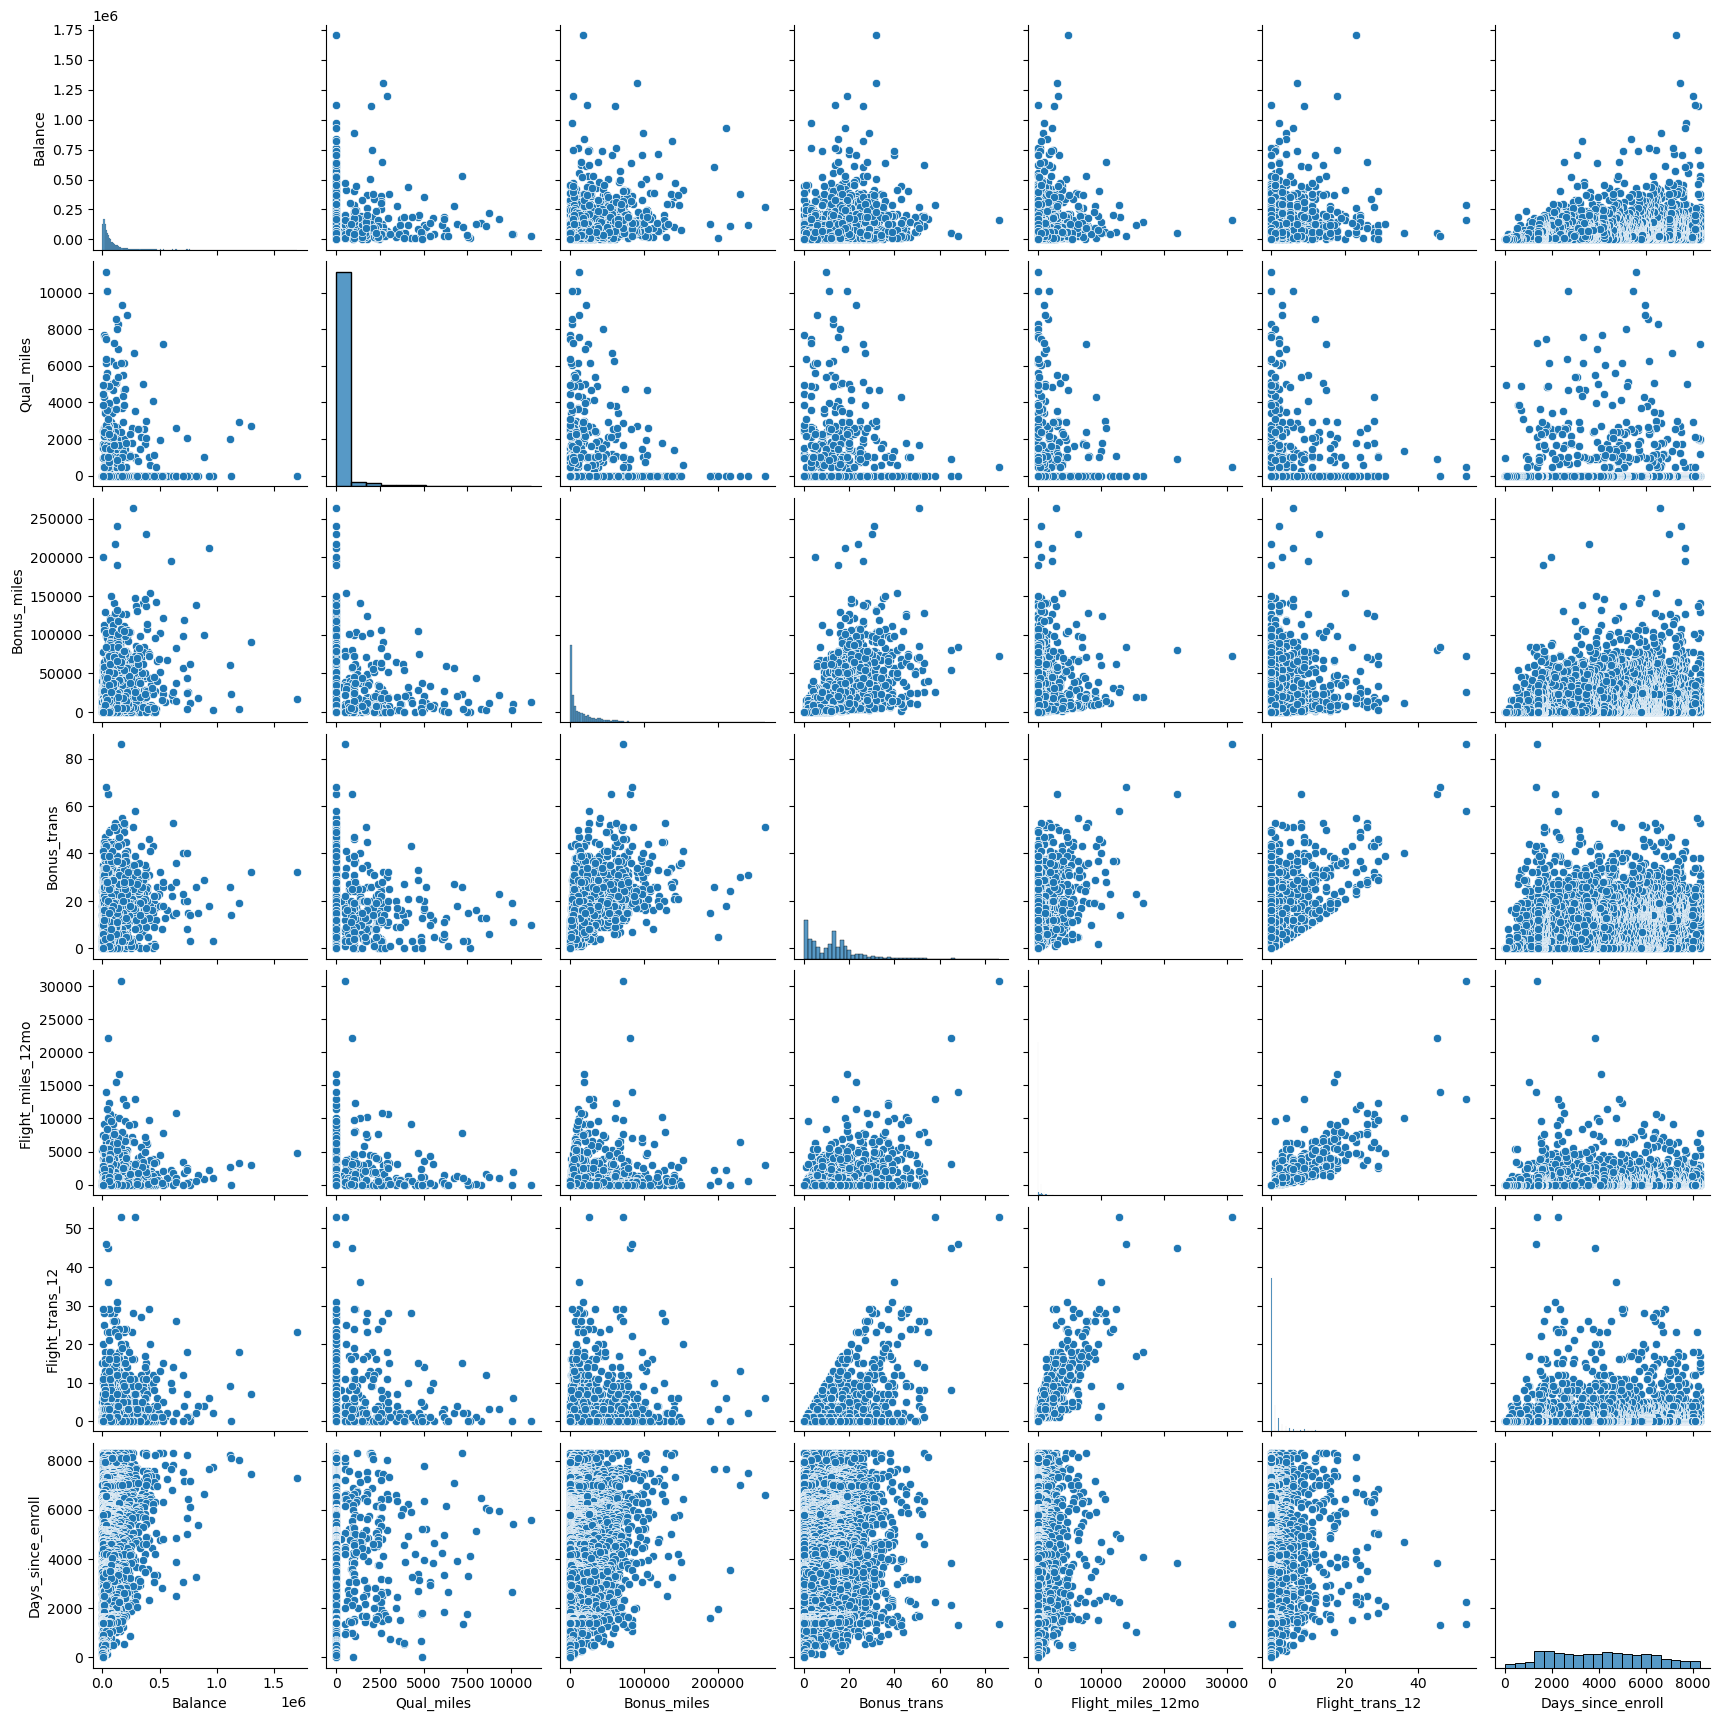

In [114]:
# Importing the warning library for ignoring the warnings
import warnings

# filtering the warnings and ignoring it
warnings.filterwarnings("ignore")

# Plotting the pair plot
sns.pairplot(airlines)

In [115]:
# Calculating the low variance between each numerical column
variance_threshold = 0.01  # Variance threshold
low_variance_columns = airlines[num_cols].var()[airlines[num_cols].var() < variance_threshold].index.tolist()
low_variance_columns

[]

In [116]:
# Calculating the high variance between each numerical column
correlation_matrix = airlines[num_cols].corr().abs()
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
high_correlation_columns = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
high_correlation_columns

[]

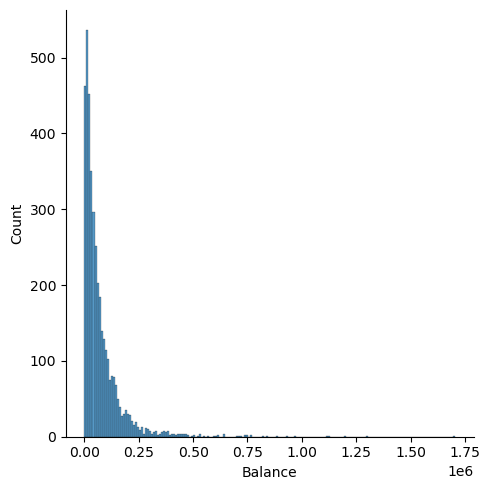

In [117]:
# Plotting the distrubution plot to check the distribution of the data
sns.displot(airlines.Balance)
plt.show()

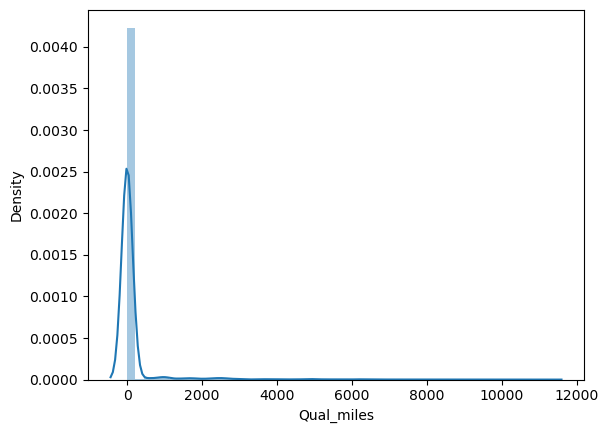

In [118]:
# Plotting the distrubution plot to check the distribution of the data
sns.distplot(airlines.Qual_miles)
plt.show()

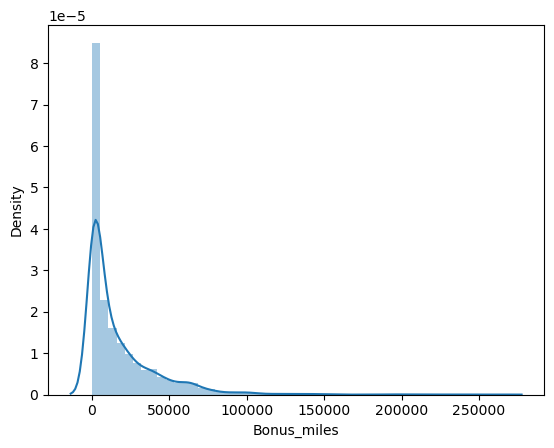

In [119]:
# Plotting the distrubution plot to check the distribution of the data
sns.distplot(airlines.Bonus_miles)
plt.show()

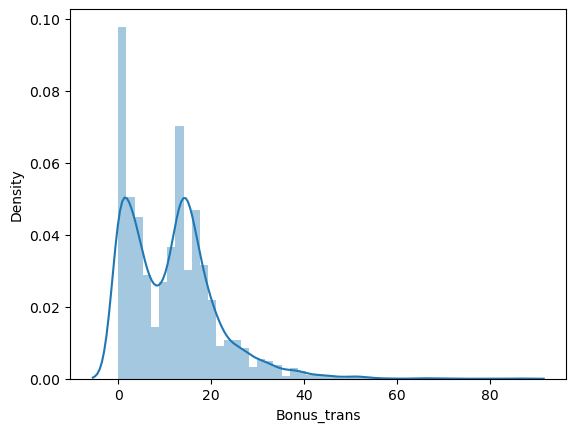

In [120]:
# Plotting the distrubution plot to check the distribution of the data
sns.distplot(airlines.Bonus_trans)
plt.show()

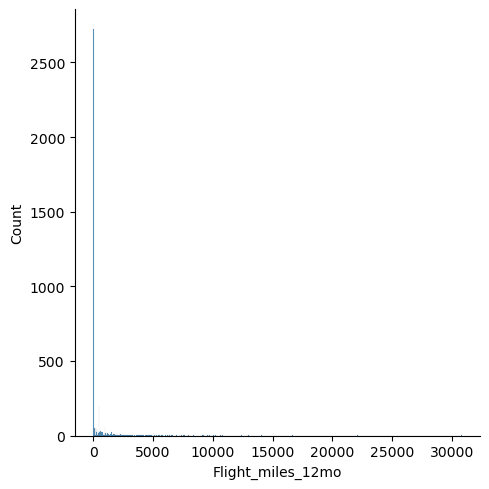

In [121]:
# Plotting the distrubution plot to check the distribution of the data
sns.displot(airlines.Flight_miles_12mo)
plt.show()

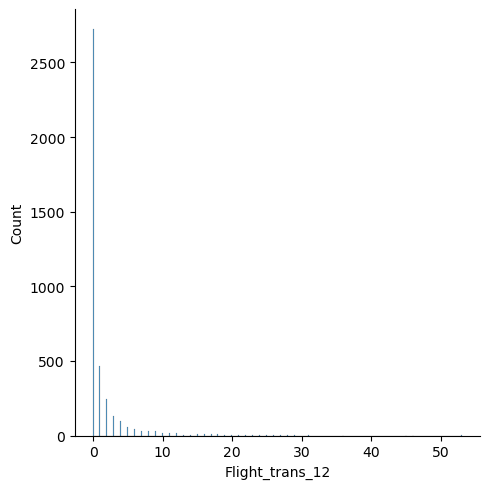

In [122]:
# Plotting the distrubution plot to check the distribution of the data
sns.displot(airlines.Flight_trans_12)
plt.show()

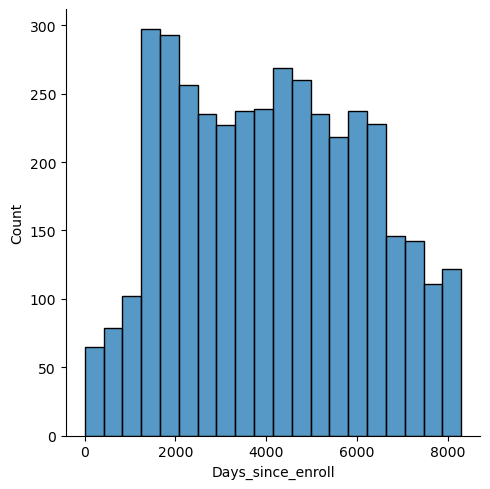

In [123]:
# Plotting the distrubution plot to check the distribution of the data
sns.displot(airlines.Days_since_enroll)
plt.show()

In [124]:
# Dropping the Award? column which is target variable
airlines_2 = airlines.drop(["Award?"], axis = 1)

# Displaying the data after dropping
airlines_2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935
...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403
3995,64385,0,1,1,1,981,5,0,0,1395
3996,73597,0,3,1,1,25447,8,0,0,1402
3997,54899,0,1,1,1,500,1,500,1,1401


In [125]:
# Defining the function for normalization
def norm_func(i):
    x = (i-i.min())/(i.max() - i.min())
    return (x)

In [126]:
# Normalizing the numerical data using the function defined above
df_norm = norm_func(airlines_2[num_cols])

# Displaying the top 5 rows after normalizing
df_norm.head()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,0.016508,0.0,0.000660,0.011628,0.000000,0.000000,0.843742
1,0.011288,0.0,0.000815,0.023256,0.000000,0.000000,0.839884
2,0.024257,0.0,0.015636,0.046512,0.000000,0.000000,0.847842
3,0.008667,0.0,0.001896,0.011628,0.000000,0.000000,0.837955
4,0.057338,0.0,0.164211,0.302326,0.067398,0.075472,0.835905


In [127]:
# Dimensionality Reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_norm)

In [128]:
# Displaying the array after PCA
X_pca

array([[ 0.32012907, -0.19554434],
       [ 0.31718174, -0.18698768],
       [ 0.32990395, -0.16088698],
       ...,
       [-0.32528954,  0.02438395],
       [-0.3435833 , -0.07835222],
       [-0.34829225, -0.10177052]])

## Implementing Clustering Algorithms

### K-Means Clustering

In [129]:
# Determine the optimal number of clusters using Elbow method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_norm)
    inertia.append(kmeans.inertia_)

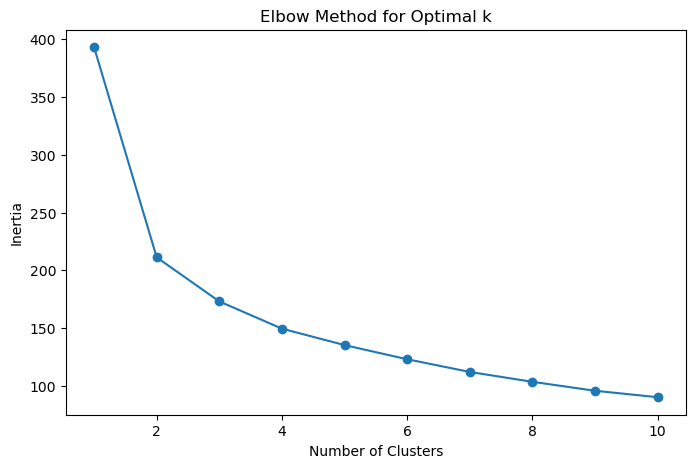

In [130]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [131]:
# Apply K-Means with optimal number of clusters (e.g., 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(df_norm)

In [132]:
# Checking the value counts of each cluster
pd.Series(kmeans_labels).value_counts()

1    1448
2    1386
0    1164
Name: count, dtype: int64

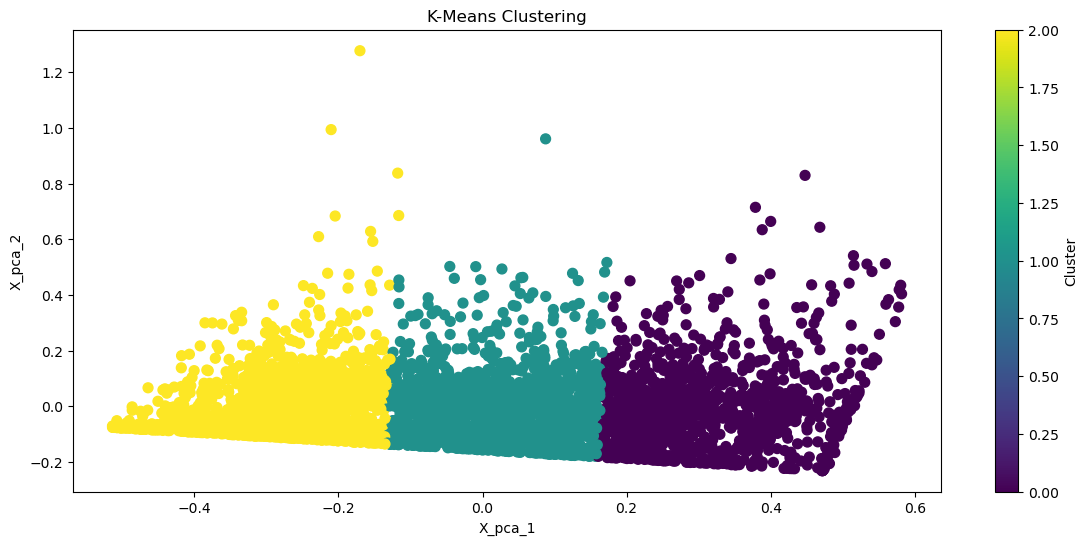

In [133]:
# Visualization: Scatter plots with PCA components
# K-Means Visualization
plt.figure(figsize=(14, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering')
plt.xlabel('X_pca_1')
plt.ylabel('X_pca_2')
plt.colorbar(label='Cluster')

### Hierarchical Clustering

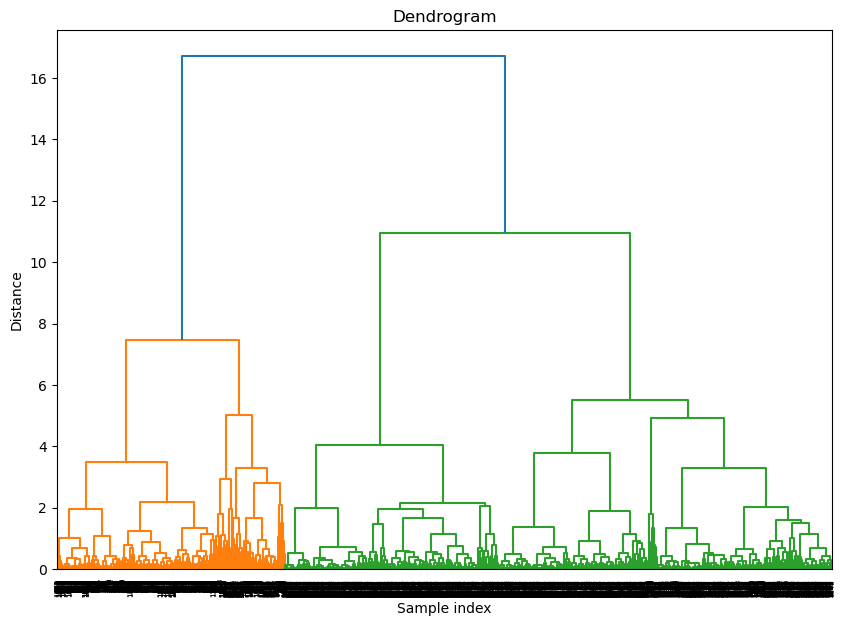

In [134]:
# Create linkage matrix
Z = linkage(df_norm, method='ward')

# Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [135]:
# Apply Hierarchical Clustering
max_d = 7  # Example threshold for forming flat clusters
hierarchical_labels = fcluster(Z, max_d, criterion='distance')

In [136]:
# Checking the value counts of each cluster
pd.Series(hierarchical_labels).value_counts()

4    1724
3    1097
1     820
2     357
Name: count, dtype: int64

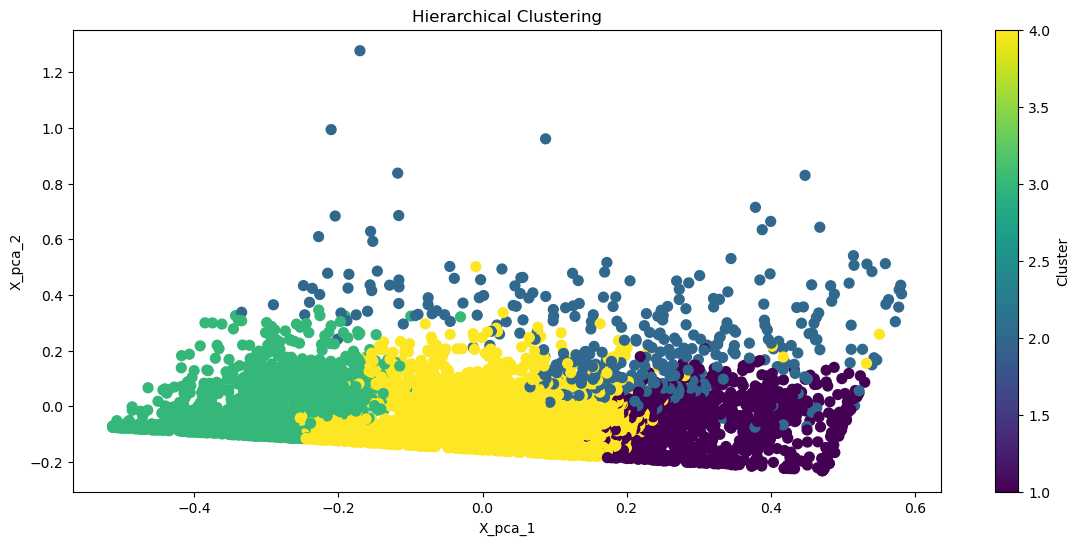

In [137]:
# Hierarchical Clustering Visualization
plt.figure(figsize=(14, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', s=50)
plt.title('Hierarchical Clustering')
plt.xlabel('X_pca_1')
plt.ylabel('X_pca_2')
plt.colorbar(label='Cluster')

### DBSCAN Clustering

In [138]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_norm)

In [139]:
# Checking the value counts of each cluster
pd.Series(dbscan_labels).value_counts()

 0    3994
-1       4
Name: count, dtype: int64

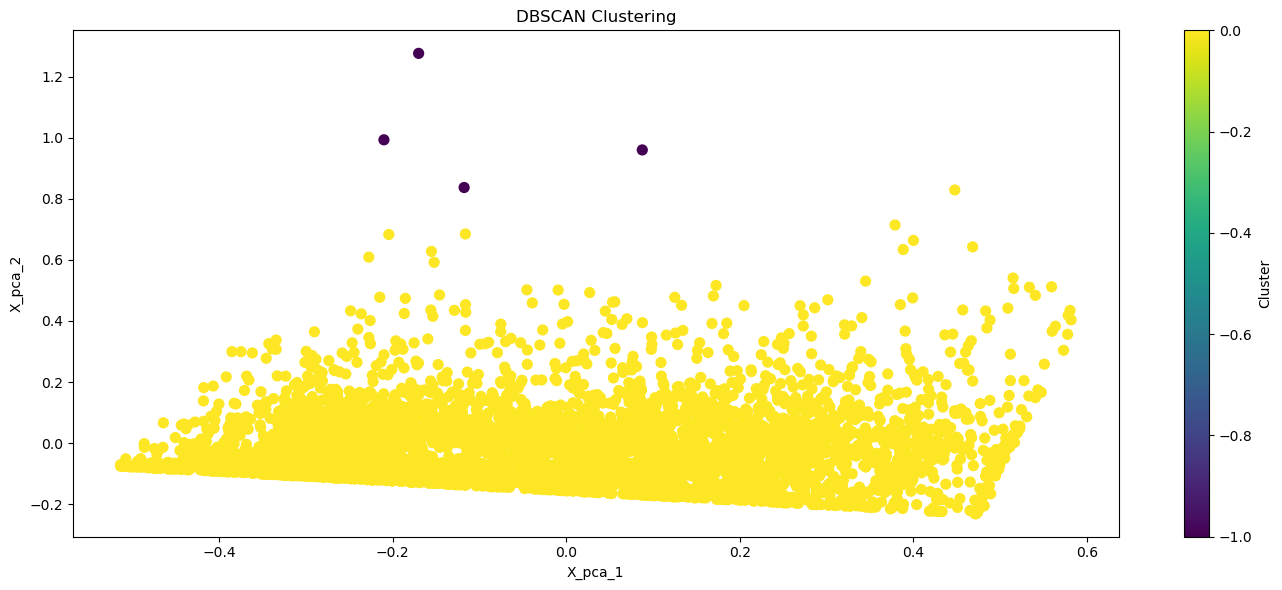

In [140]:
# DBSCAN Visualization
plt.figure(figsize=(14, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('DBSCAN Clustering')
plt.xlabel('X_pca_1')
plt.ylabel('X_pca_2')
plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

### Evaluation and Performance Metrics:#### 
Evaluate the quality of clustering using internal evaluation metrics such as silhouette score for K-Means and DBSCAN.


In [141]:
# Evaluate K-Means
silhouette_kmeans = silhouette_score(df_norm, kmeans_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

Silhouette Score for K-Means: 0.30939632090532954


In [143]:
# Evaluate Hierarchical
silhouette_kmeans = silhouette_score(df_norm, hierarchical_labels)
print(f'Silhouette Score for K-Means: {silhouette_kmeans}')

Silhouette Score for K-Means: 0.27284795041111276


In [142]:
# Evaluate DBSCAN
if len(set(dbscan_labels)) > 1:  # Ensure there is more than one cluster
    silhouette_dbscan = silhouette_score(df_norm, dbscan_labels)
    print(f'Silhouette Score for DBSCAN: {silhouette_dbscan}')
else:
    print('DBSCAN found only one cluster or noise.')

Silhouette Score for DBSCAN: 0.7158342902342987


##### Based on Silhouette Score of 3 models DBSCAN model got the highest Silhouette Score so DBSCAN model clusters are well-seperated